# 4 Datasets Plotted with Area Ridges

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



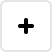
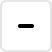
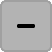
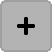
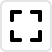
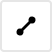
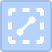
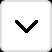
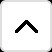
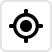

In [2]:
LetsPlot.setup_html()

## Delhi Weather

Source: https://www.kaggle.com/datasets/mahirkukreja/delhi-weather-data

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/delhi_climate.csv")
dt = df1.date.astype('datetime64[ns]').dt
df1["year"] = dt.year
df1["month"] = dt.month
df1["day"] = dt.day
print(df1.shape)
df1.head()

(1462, 8)


date   meantemp   humidity  wind_speed  meanpressure  year  month  \
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1   
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1   
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1   
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1   
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1   

   day  
0    1  
1    2  
2    3  
3    4  
4    5

In [4]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
ggplot(df1, aes("meantemp", "month")) + \
    geom_area_ridges(aes(fill="..quantile.."), scale=2, \
                     quantiles=[n / 10 for n in range(1, 10)], quantile_lines=True) + \
    scale_y_continuous(breaks=list(range(1, 13)), labels=months) + \
    scale_fill_viridis(option='magma') + \
    ggsize(800, 600)

In [5]:
from lets_plot.bistro import *

corr_plot(df1[["meantemp", "humidity", "wind_speed", "meanpressure"]]).tiles().labels().palette_Spectral().build() + \
    ggsize(800, 600)

## Most Subscribed 1000 Youtube Channels

Source: https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels

In [6]:
df2 = pd.read_csv("data/topSubscribed.csv")
df2 = df2[df2["Started"] >= 2005]
df2["Category"] = df2["Category"].replace("https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels", "Top-1000")
df2["Subscribers"] = df2["Subscribers"].str.replace(",", "").astype(int)
df2["Video Count"] = df2["Video Count"].str.replace(",", "").astype(int)
df2["Video Views (Millions)"] = (df2["Video Views"].str.replace(",", "").astype(float) / 10**6).round().astype(int)
df2["Mean Views Count per Video (Millions)"] = (df2["Video Views (Millions)"] / df2["Video Count"]).fillna(0)
df2.drop(columns=["Video Views"], inplace=True)
print(df2.shape)
df2.head()

(999, 8)


Rank             Youtube Channel  Subscribers  Video Count  \
0     1                    T-Series    234000000        18515   
1     2              YouTube Movies    161000000            0   
2     3  Cocomelon - Nursery Rhymes    152000000          846   
3     4                   SET India    150000000       103200   
4     5                     MrBeast    128000000          733   

           Category  Started  Video Views (Millions)  \
0             Music     2006                  212900   
1  Film & Animation     2015                       0   
2         Education     2006                  149084   
3             Shows     2006                  137828   
4     Entertainment     2012                   21549   

   Mean Views Count per Video (Millions)  
0                              11.498785  
1                               0.000000  
2                             176.222222  
3                               1.335543  
4                              29.398363

In [7]:
ggplot(df2, aes("Subscribers", "Started")) + \
    geom_area_ridges(aes(fill="..quantile.."), scale=2, \
                     quantiles=[n / 10 for n in range(1, 10)], \
                     quantile_lines=True, sampling=sampling_pick(1_000)) + \
    scale_y_continuous(format='{d}') + \
    scale_fill_viridis(option='viridis') + \
    xlim(0, 50_000_000) + \
    ggsize(800, 600)

In [8]:
ggplot(df2, aes("Mean Views Count per Video (Millions)", "Category")) + \
    geom_area_ridges(aes(fill="..quantile.."), scale=5, \
                     quantiles=[n / 10 for n in range(1, 10)], \
                     quantile_lines=True, sampling=sampling_pick(1_000)) + \
    scale_fill_viridis(option='viridis') + \
    xlim(0, 6) + \
    ggsize(800, 600)

## Latest Netflix TV Shows and Movies

Source: https://www.kaggle.com/datasets/senapatirajesh/netflix-tv-shows-and-movies

In [9]:
df3 = pd.read_csv("data/NetFlix.csv")
df3 = df3[df3["release_year"] >= 2000]
print(df3.shape)
df3.head()

(7338, 12)


show_id     type                                      title        director  \
0      s1  TV Show                                         3%             NaN   
1     s10    Movie                                       1920    Vikram Bhatt   
2    s100    Movie                                 3 Heroines  Iman Brotoseno   
3   s1000    Movie  Blue Mountain State: The Rise of Thadland    Lev L. Spiro   
4   s1001  TV Show                             Blue Planet II             NaN   

                                                cast         country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil   
1  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...           India   
2  Reza Rahadian, Bunga Citra Lestari, Tara Basro...       Indonesia   
3  Alan Ritchson, Darin Brooks, James Cade, Rob R...   United States   
4                                 David Attenborough  United Kingdom   

  date_added  release_year rating  duration  \
0  14-Aug-20          2020  TV-MA         4   
1  15-Dec-17          2008  TV-MA       143   
2  05-Jan-19          2016  TV-PG       124   
3  01-Mar-16          2016      R        90   
4  03-Dec-18          2017   TV-G         1   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     Horror Movies, International Movies, Thrillers   
2        Dramas, International Movies, Sports Movies   
3                                           Comedies   
4  British TV Shows, Docuseries, Science & Nature TV   

                                         description  
0  In a future where the elite inhabit an island ...  
1  An architect and his wife move into a castle t...  
2  Three Indonesian women break records by becomi...  
3  New NFL star Thad buys his old teammates' belo...  
4  This sequel to the award-winning nature series...

In [10]:
ggplot(df3, aes("duration", "release_year")) + \
    geom_area_ridges(aes(fill="..quantile.."), scale=2, \
                     quantiles=[n / 10 for n in range(1, 10)], \
                     quantile_lines=True, sampling=sampling_pick(8_000)) + \
    scale_y_continuous(format='{d}') + \
    scale_fill_viridis(option='plasma') + \
    ggsize(800, 600)

In [11]:
top_size = 100
cast_top_df = pd.concat([df3.country.to_frame(), df3.cast.str.split(",", expand=True)], axis='columns').melt(id_vars=["country"], value_name="name")[["country", "name"]].dropna().value_counts().to_frame("projects_count").reset_index().iloc[:top_size]
cast_top_df

ggplot(cast_top_df, aes(x="country")) + \
    geom_pie(aes(fill=as_discrete("name", order_by='..count..'), weight="projects_count"), \
             size=13, show_legend=False) + \
    scale_fill_viridis(option='turbo') + \
    ggsize(800, 300) + \
    theme(axis_title_y='blank', axis_text_y='blank', panel_grid='blank')

## BigMac Index - NASDAQ by Contry

Source: https://www.kaggle.com/datasets/yanmaksi/big-mac-index-dataset-by-contry

In [12]:
df4 = pd.read_csv("data/bigmac/BigMac_Index_by_Contry.csv")
print(df4.shape)
df4.head()

(604, 13)


Unnamed: 0        date  local_price  dollar_ex  dollar_price  dollar_ppp  \
0           0  2022-07-31         6.70   1.448436      4.625680    1.300971   
1           1  2022-01-31         6.40   1.419346      4.509120    1.101549   
2           2  2021-07-31         6.55   1.366587      4.792962    1.159292   
3           3  2021-01-31         6.48   1.299968      4.984740    1.144876   
4           4  2020-07-31         6.55   1.430615      4.578450    1.147110   

   dollar_valuation  dollar_adj_valuation  euro_adj_valuation  \
0           -10.181                -8.689             -12.345   
1           -22.390               -16.259             -19.096   
2           -15.169                -8.072             -15.808   
3           -11.900                -4.300             -15.000   
4           -19.817               -15.500             -17.200   

   sterling_adj_valuation  yen_adj_valuation  yuan_adj_valuation region  
0                  -2.724             58.476               5.879    AUS  
1                 -15.235             20.316             -20.061    AUS  
2                  -9.002             21.575              -7.724    AUS  
3                   1.600             18.300              -6.600    AUS  
4                  -5.200              8.100              -9.600    AUS

In [13]:
ggplot(df4, aes("dollar_price", "region")) + \
    geom_area_ridges(aes(fill="..quantile.."), scale=2, \
                     quantiles=[n / 10 for n in range(1, 10)], \
                     quantile_lines=True, sampling=sampling_pick(1_000)) + \
    scale_fill_viridis(option='cividis') + \
    ggsize(800, 600)

In [14]:
df4_2022 = df4[df4["date"] == '2022-07-31']
gdf4 = geocode_countries(df4_2022["region"]).ignore_all_errors().inc_res().get_boundaries()

ggplot() + \
    geom_livemap() + \
    geom_map(aes(fill="dollar_ppp"), data=df4_2022, map=gdf4, map_join=["region", "country"], \
             size=0, alpha=.5, show_legend=False,
             tooltips=layer_tooltips().title("@{found name}").line("dollar purchasing power parity|@dollar_ppp")) + \
    scale_fill_gradient(low="#1a9850", high="#d73027", trans='log10')